# Does the ground type of the match have an impact on the number of goals or match points?

In [2]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


p_by_p_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_point_by_point_parquet"):
    single_stats = pd.read_parquet("raw/raw_point_by_point_parquet/" + file)
    p_by_p_dataframe = pd.concat([p_by_p_dataframe, single_stats], axis= 'rows', ignore_index=True)


tournament_dataframe = pd.DataFrame()
for file in os.listdir("raw/tournament_parquet"):
    single_stats = pd.read_parquet("raw/tournament_parquet/" + file)
    tournament_dataframe = pd.concat([tournament_dataframe, single_stats], axis= 'rows', ignore_index=True)


In [3]:
# مشاهده مقادیر یونیک در ستون ground_type
unique_ground_types = tournament_dataframe['ground_type'].unique()

# نمایش نتایج
print(unique_ground_types)

['Red clay' 'Hardcourt outdoor' 'Hardcourt indoor' 'Carpet indoor' None
 'Synthetic outdoor']


In [4]:
# مشاهده تعداد هر یک از مقادیر در ستون ground_type
ground_type_counts = tournament_dataframe['ground_type'].value_counts()

# نمایش تعداد هر کدام از مقادیر
print(ground_type_counts)


ground_type
Hardcourt outdoor    336
Red clay             323
Hardcourt indoor      84
Carpet indoor          3
Synthetic outdoor      1
Name: count, dtype: int64


In [5]:

# مرج دو جدول بر اساس مچ_آی‌دی
merged_df = pd.merge(p_by_p_dataframe, tournament_dataframe[['match_id', 'ground_type']], on='match_id')

# محاسبه مجموع امتیازات تیم میزبان و مهمان برای هر مسابقه
merged_df['total_points'] = merged_df['home_point'] + merged_df['away_point']

# محاسبه مجموع امتیازات هر مسابقه
points_by_match = merged_df.groupby('match_id')['total_points'].sum().reset_index()

# ترکیب مجموع امتیازات با نوع زمین
merged_with_points = pd.merge(points_by_match, tournament_dataframe[['match_id', 'ground_type']], on='match_id')
# تبدیل ستون total_points به نوع عددی
merged_with_points['total_points'] = pd.to_numeric(merged_with_points['total_points'], errors='coerce')
# محاسبه میانگین امتیازات برای هر نوع زمین
avg_points_per_ground = merged_with_points.groupby('ground_type')['total_points'].mean()

# نمایش نتیجه
print(avg_points_per_ground)


ground_type
Carpet indoor                  NaN
Hardcourt indoor               NaN
Hardcourt outdoor              NaN
Red clay             7.545389e+200
Synthetic outdoor     1.501515e+80
Name: total_points, dtype: float64


In [6]:
# مشاهده مقادیر منحصر به فرد در ستون ground_type
unique_ground_types = tournament_dataframe['ground_type'].unique()
print(unique_ground_types)


['Red clay' 'Hardcourt outdoor' 'Hardcourt indoor' 'Carpet indoor' None
 'Synthetic outdoor']


In [7]:
# تبدیل نوع ستون به رشته و حذف مقادیر NaN
tournament_dataframe['ground_type'] = tournament_dataframe['ground_type'].astype(str)
tournament_dataframe = tournament_dataframe[tournament_dataframe['ground_type'] != 'nan']


In [8]:
# مشاهده تعداد هر یک از مقادیر در ستون ground_type
ground_type_counts = tournament_dataframe['ground_type'].value_counts()

# نمایش تعداد هر کدام از مقادیر
print(ground_type_counts)


ground_type
Hardcourt outdoor    336
Red clay             323
Hardcourt indoor      84
None                  17
Carpet indoor          3
Synthetic outdoor      1
Name: count, dtype: int64


In [9]:

# Merge دو جدول بر اساس match_id
merged_df = pd.merge(p_by_p_dataframe, tournament_dataframe[['match_id', 'ground_type']], on='match_id')

# محاسبه مجموع امتیازات تیم میزبان و مهمان برای هر مسابقه
merged_df['total_points'] = merged_df['home_point'] + merged_df['away_point']

# محاسبه مجموع امتیازات هر مسابقه
points_by_match = merged_df.groupby('match_id')['total_points'].sum().reset_index()

# ترکیب مجموع امتیازات با نوع زمین
merged_with_points = pd.merge(points_by_match, tournament_dataframe[['match_id', 'ground_type']], on='match_id')
# تبدیل ستون total_points به نوع عددی
merged_with_points['total_points'] = pd.to_numeric(merged_with_points['total_points'], errors='coerce')
# محاسبه میانگین امتیازات برای هر نوع زمین
avg_points_per_ground = merged_with_points.groupby('ground_type')['total_points'].mean()

# نمایش نتیجه
print(avg_points_per_ground)


ground_type
Carpet indoor                  NaN
Hardcourt indoor               NaN
Hardcourt outdoor              NaN
None                           NaN
Red clay             7.545389e+200
Synthetic outdoor     1.501515e+80
Name: total_points, dtype: float64


In [10]:
# حذف ردیف‌هایی که مقادیر غیرعددی دارند
merged_df = merged_df[merged_df['home_point'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
merged_df = merged_df[merged_df['away_point'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# تبدیل به نوع عددی
merged_df['home_point'] = pd.to_numeric(merged_df['home_point'], errors='coerce')
merged_df['away_point'] = pd.to_numeric(merged_df['away_point'], errors='coerce')

# محاسبه مجموع امتیازات
merged_df['total_points'] = merged_df['home_point'] + merged_df['away_point']


In [11]:
# محاسبه میانگین امتیازات برای هر نوع زمین
avg_points_per_ground = merged_df.groupby('ground_type')['total_points'].mean()

# نمایش نتیجه
print(avg_points_per_ground)


ground_type
Carpet indoor        40.674121
Hardcourt indoor     41.333386
Hardcourt outdoor    43.126553
None                 37.362500
Red clay             42.854245
Synthetic outdoor    32.291667
Name: total_points, dtype: float64


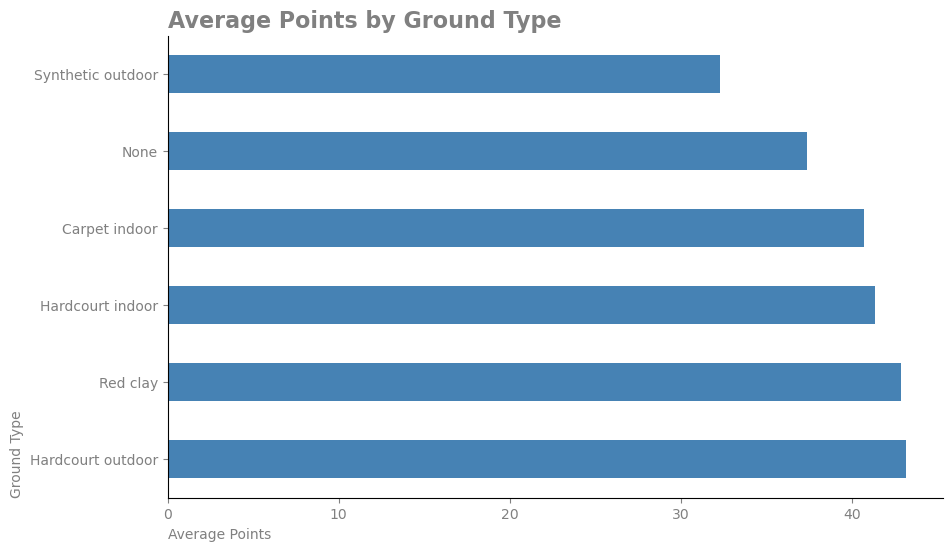

In [14]:

# مرتب‌سازی میانگین امتیازات از زیاد به کم
sorted_avg_points = avg_points_per_ground.sort_values(ascending=False)

# ترسیم نمودار به صورت افقی
plt.figure(figsize=(10, 6))
sorted_avg_points.plot(kind='barh', color='#4682b4')
plt.title('Average Points by Ground Type', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Average Points', fontsize=10, color='gray', loc = 'left')
plt.ylabel('Ground Type', fontsize=10, color='gray', loc='bottom')
plt.tick_params(colors='gray')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()
